In [12]:
with open('/home/daphne/ChordifyVSDataFusion', 'r') as read_file:
    lines = read_file.readlines()
names = lines[0].split()
print names
results = dict()
for name in names:
    results[name] = []
for line in lines[1:]:
    parts = line.split()
    for p in range(len(parts)):
        results[names[p]].append(float(parts[p]))
        


['ChordifyCSR', 'ChordifyOverseg', 'ChordifyUnderseg', 'ChordifySeg', 'DF-ALLCSR', 'DF-ALLOverseg', 'DF-ALLUnderseg', 'DF-ALLSeg', 'DF-BESTCSR', 'DF-BESTOverseg', 'DF-BESTUnderseg', 'DF-BESTSeg']


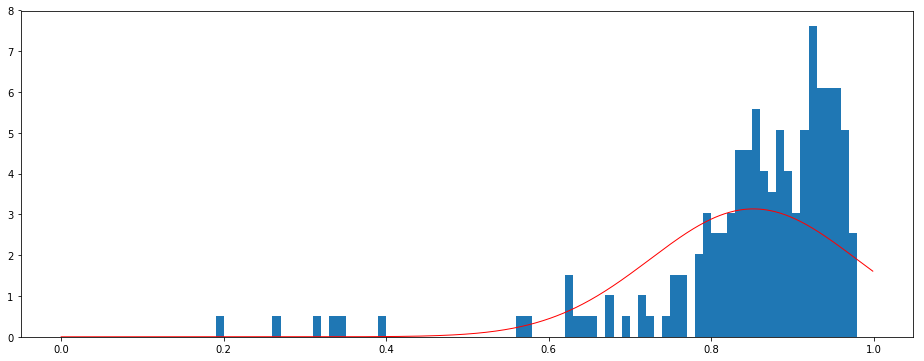

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

fig, axes = plt.subplots(figsize=(16, 6))
# plt.suptitle('Number of chord labels', fontsize=25)
i = 4

# axes_flat = axes.flatten()
bins = np.arange(0, 1, 0.01)
# for ax_nr in range(len(axes_flat)):
axes.hist(np.array([x ** 1 for x in results[names[i]]]), bins, normed=True)
mean = np.mean([x ** 1 for x in results[names[i]]], axis=0)
stdev = np.std([x ** 1 for x in results[names[i]]], axis=0)
y = norm.pdf(np.arange(0, 1, 0.001), mean, stdev)
l = axes.plot(np.arange(0, 1, 0.001), y, 'r', linewidth=1)
    
#     axes_flat[ax_nr].set_title(names[ax_nr] + ' ($\mu=$' + str(round(means, 2)) + ', $\sigma=$' 
#                                + str(round(stdevs, 2)) + ')')
#     axes_flat[ax_nr].set_xlim([0, 500])
#     axes_flat[ax_nr].set_ylim([0, 0.025])

plt.show()

In [73]:
print names
from scipy.stats import wilcoxon
print wilcoxon(results['ChordifyCSR'], results['DF-ALLCSR'])
print wilcoxon(results['ChordifyCSR'], results['DF-BESTCSR'])

['ChordifyCSR', 'ChordifyOverseg', 'ChordifyUnderseg', 'ChordifySeg', 'DF-ALLCSR', 'DF-ALLOverseg', 'DF-ALLUnderseg', 'DF-ALLSeg', 'DF-BESTCSR', 'DF-BESTOverseg', 'DF-BESTUnderseg', 'DF-BESTSeg']
WilcoxonResult(statistic=6542.0, pvalue=6.183330553119009e-05)
WilcoxonResult(statistic=3811.0, pvalue=1.2236007848502879e-13)


In [1]:
import MainModule

In [2]:
all_songs = MainModule.recognize_chords()

080-001 went wrong
080-002 went wrong
098-003 went wrong
098-004 went wrong
131-003 went wrong
137-004 went wrong
138-003 went wrong
148-005 went wrong
155-004 went wrong
162-001 went wrong
162-002 went wrong
162-003 went wrong


/home/daphne/PycharmProjects/chordrecognizer/venv/local/lib/python2.7/site-packages/mir_eval/io.py:240: UserWarning: All interval durations must be strictly positive
  warnings.warn(error.args[0])


# Compare number of chords per representation
Do some representations result in more fine-grained chord labels?

In [3]:
def get_nr_of_lines_from_lab(lab_file_path):
    with open(lab_file_path, 'r') as read_file:
        l = read_file.readlines()
    return len(l)

nr_of_lines = [[], [], [], [], []]
for song_key in all_songs:
    song = all_songs[song_key]
    nr_of_lines[0].append(get_nr_of_lines_from_lab(song.full_ground_truth_chord_labs_path))
    
    results = all_songs[song_key].results
    for result in results:
        if result[0] == 'chordify':
            nr_of_lines[1].append(get_nr_of_lines_from_lab(result[2]))
        elif result[0] == 'midi':
            nr_of_lines[2].append(get_nr_of_lines_from_lab(result[2]))
        elif result[0] == 'tab':
            nr_of_lines[3].append(get_nr_of_lines_from_lab(result[2]))
        elif result[0] == 'data fusion':
            nr_of_lines[4].append(get_nr_of_lines_from_lab(result[2]))

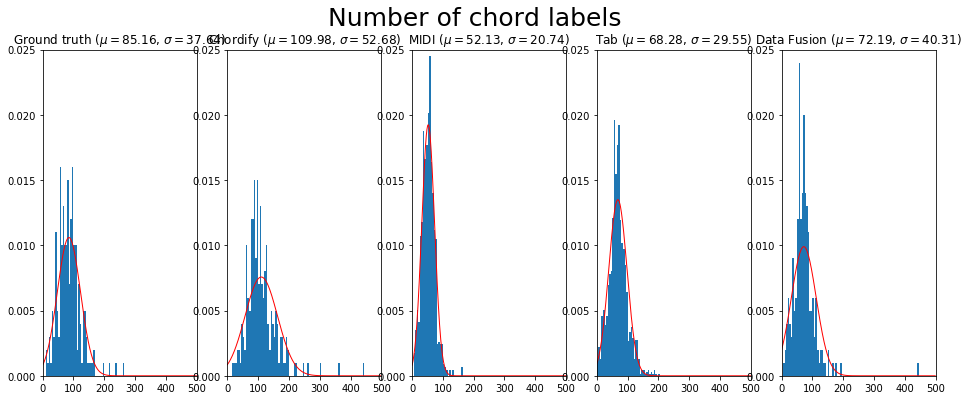

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

names = ['Ground truth', 'Chordify', 'MIDI', 'Tab', 'Data Fusion']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 6))
plt.suptitle('Number of chord labels', fontsize=25)

axes_flat = axes.flatten()
bins = np.arange(0, 500, 5)
for ax_nr in range(len(axes_flat)):
    axes_flat[ax_nr].hist(np.array(nr_of_lines[ax_nr]), bins, normed=True)
    
    means = np.mean(nr_of_lines[ax_nr], axis=0)
    stdevs = np.std(nr_of_lines[ax_nr], axis=0)
    y = norm.pdf(np.arange(0, 500, 1), means, stdevs)
    l = axes_flat[ax_nr].plot(np.arange(0, 500, 1), y, 'r', linewidth=1)
    
    axes_flat[ax_nr].set_title(names[ax_nr] + ' ($\mu=$' + str(round(means, 2)) + ', $\sigma=$' 
                               + str(round(stdevs, 2)) + ')')
    axes_flat[ax_nr].set_xlim([0, 500])
    axes_flat[ax_nr].set_ylim([0, 0.025])

plt.show()

In [13]:
import ChordTemplateGenerator, Chords

def chords_list_to_alphabet(chords_list):
    alphabet = ['N']
    for chord_template in chords_list:
        key_nr, mode_str, _ = chord_template
        key_str = Chords.PITCH_CLASSES[key_nr]
        alphabet.append(key_str + mode_str)
    return alphabet

chords_list = ChordTemplateGenerator.generate_chroma_major_minor()
alphabet = chords_list_to_alphabet(chords_list)

def get_index_in_alphabet(chord, alphabet):
    if len(alphabet) == 25:
        # Majmin alphabet
        if chord is None:
            chord_str = 'N'
        elif Chords.Interval(3) in chord.components_degree_list:
            chord_str = str(chord.root_note) + 'm'
        else:
            chord_str = str(chord.root_note)
        if chord_str not in alphabet:
            foutje = True
        return alphabet.index(chord_str)
    else:
        return 0  # Nog implementeren voor andere alphabets

def get_chord_counters_from_lab(lab_file_path):
    result = np.zeros(len(alphabet))
    with open(lab_file_path, 'r') as read_file:
        l = read_file.readlines()
    for line in l:
        chord = get_index_in_alphabet(Chords.Chord.from_harte_chord_string(line.split()[2]), alphabet)
        result[chord] += (float(line.split()[1]) - float(line.split()[0]))
    return result / sum(result)

get_chord_counters_from_lab(all_songs[1].full_ground_truth_chord_labs_path)
chord_counters = [[], [], [], [], []]
for song_key in all_songs:
    song = all_songs[song_key]
    chord_counters[0].append(get_chord_counters_from_lab(song.full_ground_truth_chord_labs_path))
    
    results = all_songs[song_key].results
    for result in results:
        if result[0] == 'chordify':
            chord_counters[1].append(get_chord_counters_from_lab(result[2]))
        elif result[0] == 'midi':
            chord_counters[2].append(get_chord_counters_from_lab(result[2]))
        elif result[0] == 'tab':
            chord_counters[3].append(get_chord_counters_from_lab(result[2]))
        elif result[0] == 'data fusion':
            chord_counters[4].append(get_chord_counters_from_lab(result[2]))
            
chord_counters2 = np.zeros((len(chord_counters), len(alphabet)))
for representation in range(len(chord_counters)):
    for c in range(len(alphabet)):
        this_chord_ratio_list = [x[c] for x in chord_counters[representation]]
        chord_counters2[representation, c] = np.mean(this_chord_ratio_list)

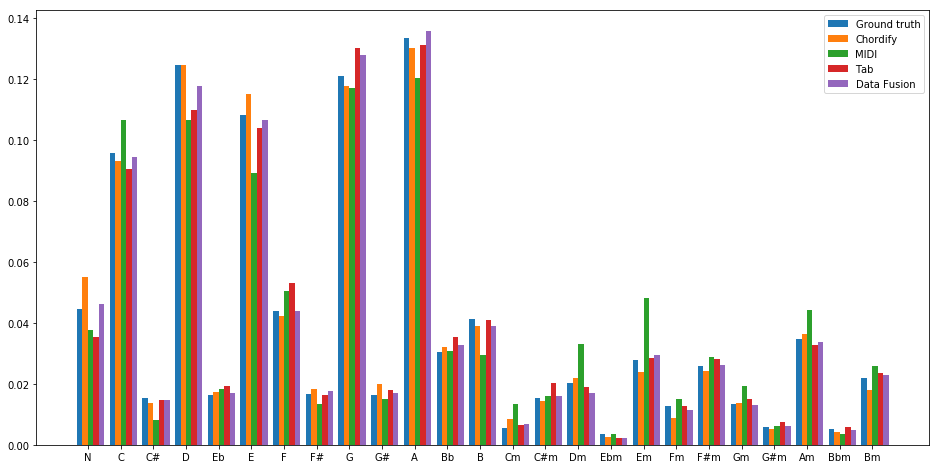

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
ind = range(len(alphabet))
width = 1 / float(len(chord_counters) + 1)

bars = []
for ax_nr in range(len(chord_counters)):
    bars.append(ax.bar([i + (ax_nr - 1.5) * width for i in ind], chord_counters2[ax_nr], width))
ax.set_xticks(np.arange(25))
ax.set_xticklabels(alphabet)

ax.legend([x[0] for x in bars], names)

plt.show()